<a href="https://colab.research.google.com/github/RozhanMk/Time-Series-Analysis/blob/master/EWMA_and_Holt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L -o air-passengers.zip\
  https://www.kaggle.com/api/v1/datasets/download/rakannimer/air-passengers

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   764  100   764    0     0   1957      0 --:--:-- --:--:-- --:--:--  1957


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!unzip air-passengers.zip

Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


In [ ]:
df = pd.read_csv('AirPassengers.csv')
display(df.head())

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: >

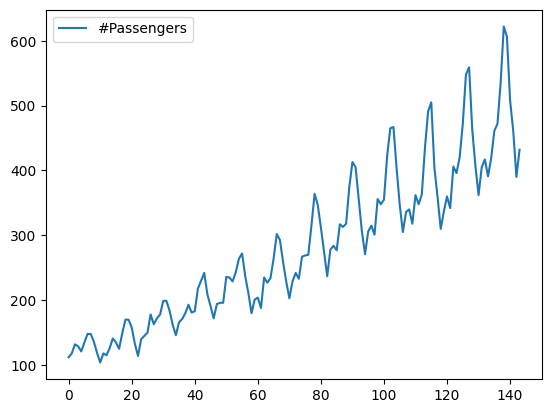

In [ ]:
df.plot()

## EWMA

<Axes: >

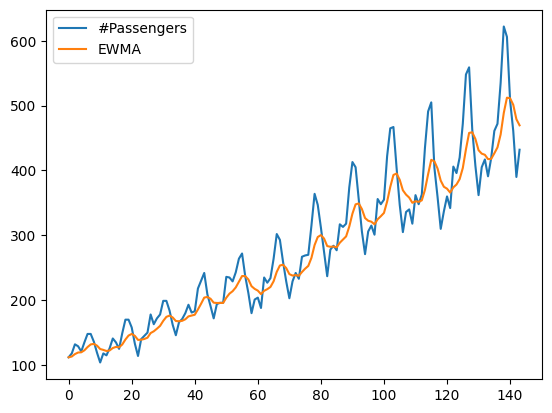

In [ ]:
df["EWMA"] = df["#Passengers"].ewm(alpha=0.2, adjust=False).mean()
df.plot()

<Axes: >

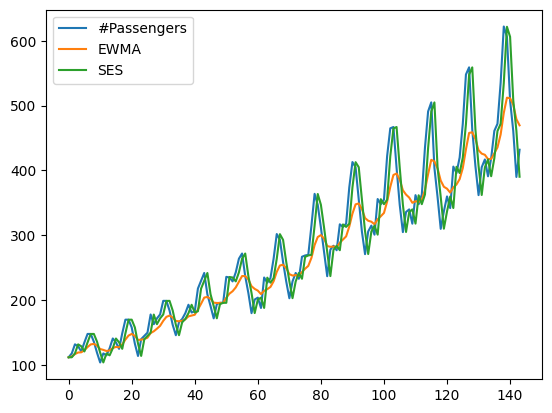

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df['#Passengers'])
fit1 = model.fit()
df['SES'] = fit1.fittedvalues
df.plot()

In [ ]:
N_test = 12
train_data = df[:-N_test]
test_data = df[-N_test:]
train_idx = df.index <= train_data.index[-1]
test_idx = df.index > train_data.index[-1]

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the model
model = SimpleExpSmoothing(train_data['#Passengers'])
fit1 = model.fit()

# Get the fitted values and forecasts
df.loc[train_idx, 'SESfitted'] = fit1.fittedvalues
df.loc[test_idx, "SESfitted"] = fit1.forecast(N_test) # Forecast the next 12 periods

display(df.tail())

,Month,#Passengers,EWMA,SES,SESfitted
139,1960-08,606,512.214093,621.563424,404.786132
140,1960-09,508,511.371274,606.077817,404.786132
141,1960-10,461,501.297019,508.490389,404.786132
142,1960-11,390,479.037615,461.237452,404.786132
143,1960-12,432,469.630092,390.356187,404.786132


<Axes: >

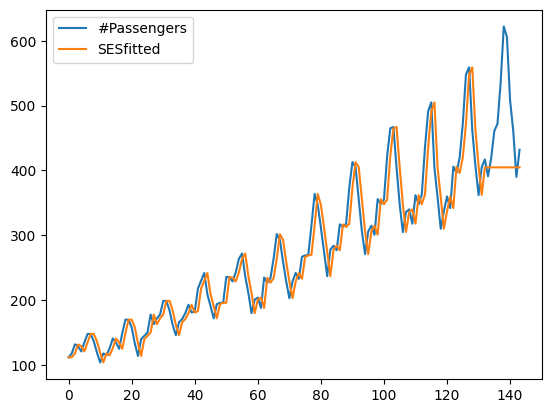

In [ ]:
df[["#Passengers", "SESfitted"]].plot()

,Month,#Passengers,EWMA,SES,SESfitted,Holt
0,1949-01,112,112.0000,112.000000,112.000000,118.000000
1,1949-02,118,113.2000,112.000000,112.000000,117.985093
2,1949-03,132,116.9600,117.970000,117.970000,123.977513
3,1949-04,129,119.3680,131.929850,131.929850,137.997464
4,1949-05,121,119.6944,129.014649,129.014649,134.985294


<Axes: >

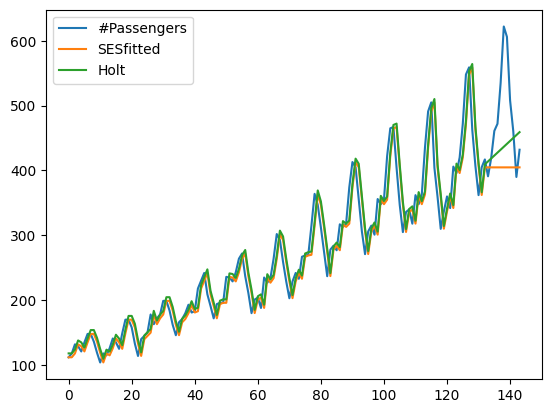

In [ ]:
from statsmodels.tsa.holtwinters import Holt
model = Holt(train_data['#Passengers'], initialization_method="legacy-heuristic")
fit2 = model.fit()

df.loc[train_idx, 'Holt'] = fit2.fittedvalues
df.loc[test_idx, "Holt"] = fit2.forecast(N_test)

display(df.head())
df[["#Passengers", "SESfitted", "Holt"]].plot()

<Axes: >

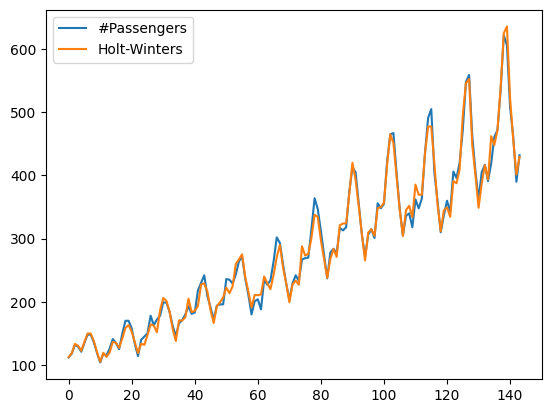

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(
    train_data['#Passengers'],
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    initialization_method="legacy-heuristic",
)
fit3 = model.fit()

df.loc[train_idx, "Holt-Winters"] = fit3.fittedvalues
df.loc[test_idx, "Holt-Winters"] = fit3.forecast(N_test)

df[["#Passengers", "Holt-Winters"]].plot()

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE Holt-Winters:", rmse(df.loc[test_idx, "#Passengers"], df.loc[test_idx, "Holt-Winters"]))

RMSE Holt-Winters: 16.535212108255575
